# Data Wrangling

## Table of Contents

<ul>
 <li><a href="#intro">Introduction</a></li>
 <li><a href="#gather">Gathering Data</a></li>
 <li><a href="#assess">Assessing Data</a></li>
 <li><a href="#clean">Cleaning Data</a></li>
 <li><a href="#analysis">Analysis</a></li>
 </ul>
    


<a id='intro'></a>
## Introduction

This project focuses on the three steps of data wrangling: gather, assess and clean, using the 'WeRateDogs' data from Twitter. 'WeRateDogs' is a Twitter account that rates dogs on a scale of 1-10 but records the points in excess of the maximum(which is 10). 

Some of the twitter archive data was already provided for this project but we had to query Twitter's API to gather additional data; retweet count and favorite counts.

A datafile containing the dogs images corresponding to the dog id was also provided but also had to be downloaded programmatically using requests. 

This project is thus divided into 3 sections:
1. Gather - Get all the necessary data needed
2. Assess for messy and untidy data
3. Clean - programmatically edit and modify the data to get a tidy dataset that can be used for analysis

In [1]:
# import all the necessary packages need for this assignment
import pandas as pd
import tweepy
import requests
import json
import numpy as np
import matplotlib as plt

<a id='gather'></a>
# Gathering Data

In [32]:
# load the twitter archive data and display first 5 rows of data
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [33]:
# use requests to gather the images dataset containing the dog images

tweet_images_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tweet_images_url)

# write the downloaded information into a folder - file
with open(tweet_images_url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
# read the images dataset and display the first 2 rows of data
image_tsv = pd.read_csv('image-predictions.tsv', sep = '\t')
image_tsv.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [323]:
image_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
consumer_key = #
consumer_secret = #
access_token = #
access_secret = #

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True,  wait_on_rate_limit_notify = True)

In [36]:
# first, define tweet_id
tweet_ids = df.tweet_id.tolist()

In [37]:

import time #to calculate the time the code takes to run
start = time.time()

with open('tweet_json.txt', "w") as file:
    for tweet_id in tweet_ids:
        try:
            tweet_page = api.get_status(tweet_id, tweet_mode='extended')
            tweet_data = json.dumps(tweet_page._json) #convert the file into a json file
            file.write(tweet_data + '\n')
           
        except:
            print("error", + (tweet_id))
         

end = time.time()
print(end - start)


error 888202515573088257
error 873697596434513921
error 872668790621863937
error 869988702071779329
error 866816280283807744
error 861769973181624320
error 845459076796616705
error 842892208864923648
error 837012587749474308
error 827228250799742977
error 802247111496568832
error 775096608509886464
error 770743923962707968


Rate limit reached. Sleeping for: 669


error 754011816964026368


Rate limit reached. Sleeping for: 423


1942.8175811767578


In [39]:
# loading the json file
with open('tweet_json.txt') as json_file:
    line = json_file.readline()
    tweet = json.loads(line)


In [42]:
# read the json file
with open('tweet_json.txt') as json_file:
    df1 = pd.DataFrame(columns = ['tweet_id', 
                                        'favorites', 
                                        'retweets']) #create a dataframe (df1) from the json file
    for line in json_file:
        tweet = json.loads(line) #read the data by line
        df1 = json_info.append({
            'tweet_id': tweet['id'],
            'favorites': tweet['favorite_count'],
            'retweets': tweet['retweet_count'] #appends the name of the columns
        }, ignore_index=True)

In [45]:
# display first 5 rows
df1.head()

,tweet_id,favorites,retweets
0,892420643555336193,38258,8380
1,892177421306343426,32798,6188
2,891815181378084864,24694,4093
3,891689557279858688,41585,8522
4,891327558926688256,39765,9229


<a id='assess'></a>
# Assessing Data

In [46]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [58]:
# display a random sample
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667861340...,9,10,a,None,None,None,None
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None
1485,693155686491000832,NaN,NaN,2016-01-29 19:36:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dunkin. He can only see when he's wet ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693155686...,12,10,Dunkin,None,None,None,None
2006,672267570918129665,NaN,NaN,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you accidentally open up the front facing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672267570...,10,10,None,None,None,None,None


In [125]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Bailey          7
Toby            7
an              7
Daisy           7
Buddy           7
Milo            6
Jack            6
Dave            6
Oscar           6
Koda            6
Leo             6
Stanley         6
Rusty           6
Bella           6
Jax             6
Scout           6
George          5
             ... 
incredibly      1
Frönq           1
Storkson        1
Stefan          1
Peanut          1
Brownie         1
Genevieve       1
Gerbald         1
Lipton          1
DonDon          1
Brandonald      1
Dewey           1
Charl           1
Rilo            1
Tripp           1
Jazz            1
Henry           1
Rover           1
Devón           1
Sweet           1
Ben             1
Superpup        1
Wesley          1
Cedrick         1
Pancake   

Note the names with just an 'a' - will look deeper into this

some dogs have names as 'none' and the dog index 2249 # has 'a' listed as name

In [236]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [48]:
image_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [62]:
image_tsv.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1484,781524693396357120,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,1,tennis_ball,0.994712,False,Chesapeake_Bay_retriever,0.003523,True,Labrador_retriever,0.000921,True
997,708356463048204288,https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg,2,pug,0.871283,True,French_bulldog,0.041820,True,bath_towel,0.015228,False
574,678446151570427904,https://pbs.twimg.com/media/CWpTLOYWsAEDhcU.jpg,1,Staffordshire_bullterrier,0.284492,True,Rottweiler,0.189434,True,American_Staffordshire_terrier,0.189430,True


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id     2343 non-null object
favorites    2343 non-null object
retweets     2343 non-null object
dtypes: object(3)
memory usage: 55.0+ KB


In [51]:
image_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
# duplicated columns in the 3 tables 
all_columns = pd.Series(list(df) + list(df1) + list(image_tsv))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [54]:
image_tsv['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [84]:
# number of rows with denominator greater than 10. Important to evaluate since the rating denominator should be 10.
len(df[df.rating_denominator >10])

20

In [61]:
# duplicates in the archive data
sum(df.duplicated())

0

In [201]:
# sum of duplicated rows in the new data
sum(df1.duplicated())

1

In [207]:
df1[df1['tweet_id'].duplicated()] #identify the index of the duplicated row

,tweet_id,favorites,retweets
2342,666020888022790149,2545,508


In [203]:
sum(image_tsv.duplicated()) #duplicates in the image dataset

0

### Visual Assessment
#### Quality

**df(archive) table**
1. 'in reply to user id', 'in reply to status id', 'retweeted status', 'retweeted status id' and 'retweeted timestamp' columns should be deleted as we are only intrested in original data
2. 23 entries have a denominator greater than 10
3. some dogs have names as 'none' and the dog index 2249 # has 'a' listed as name
4. missing data as original archive had 2356 entries while the image predictions dataset has 2075 entries - which means some of the dog ids' will be missing images
5. timestamp is a string not datetime

**images table**
6. Names of the dogs in the images dataset have mismatched lower and uppercase for the first letter

**df1(new) table**

7. all the variables in the df1 table are strings instead of integers
8. Duplicated entry #2343

#### Tidiness
1. separate timestamp to date and time
2. merge all tables to one since they are all related

<a id='clean'></a>
## Cleaning Data

In [88]:
# make copies of all the datasets:
df1_clean = df1.copy()
images_clean = image_tsv.copy()

In [166]:
twitter_clean = df.copy()
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Deleting unnecessary columns

** Define**

For this assignment, we only need original tweets so 'in reply to user id' and 'in reply to status id', 'retweeted status', 'retweeted status id' and 'retweeted timestamp' columns should be deleted as they are not relevant at this time.

**Code**

In [167]:
twitter_clean.drop(columns = ["in_reply_to_status_id", 
                          "in_reply_to_user_id",
                          "retweeted_status_id", 
                          "retweeted_status_user_id",
                          "retweeted_status_timestamp"], inplace=True)

**Test**

In [181]:
list(twitter_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'date',
 'time']

**Test**

#### converting tweet_id to a string datatype

** Define**

converting the id datatype to string


**Code**

In [170]:
twitter_clean["tweet_id"] = twitter_clean["tweet_id"].astype("str")
images_clean["tweet_id"] = images_clean["tweet_id"].astype("str")
df1_clean["tweet_id"] = df1_clean["tweet_id"].astype("str")

**Test**

In [183]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id     2343 non-null object
favorites    2343 non-null object
retweets     2343 non-null object
dtypes: object(3)
memory usage: 55.0+ KB


#### Converting timestamp to a datetime
**Define**

Timestamp is entered as a combination of date and time. By converting the variable to datetime, this splits the date and time into separate columns. This makes the data neat and easy to extract information. 

**Code**

In [171]:
from datetime import datetime
twitter_clean["timestamp"] = pd.to_datetime(twitter_clean["timestamp"])

In [172]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


In [173]:
twitter_clean['date'], twitter_clean['time'] = twitter_clean['timestamp'].dt.normalize(), twitter_clean['timestamp'].dt.time

**Test**

In [174]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


In [175]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
date                  2356 non-null datetime64[ns]
time                  2356 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 257.8+ KB


#### Replacing the 'a' in the name column
**Define**

During visual assessment, I noticed that there was some entries with 'a' as the name of the dog. I figured that maybe that must have been a mistake since its hardly likely that there is a dog named a. On further assessment, there were 55 other entries with 'a' listed as the name of the dog. To ease in interpretation, i replace the 'a' with 'None' as in no name provided.

**Code**

In [219]:
twitter_clean['name'].value_counts()

None          782
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
Bailey          7
Daisy           7
Buddy           7
Oscar           6
Stanley         6
Leo             6
Milo            6
an              6
Rusty           6
Scout           6
Jack            6
Jax             6
Bella           6
Dave            6
Koda            6
Bentley         5
Phil            5
             ... 
Kramer          1
Longfellow      1
incredibly      1
Frönq           1
Storkson        1
Genevieve       1
Kody            1
Glacier         1
Henry           1
Rudy            1
Gerbald         1
DonDon          1
Brandonald      1
Dewey           1
Charl           1
Rilo            1
Tripp           1
Jazz            1
Rover           1
Bobb            1
Lipton          1
Devón           1
Ben             1
Superpup        1
Wesley    

In [214]:
twitter_clean['name'].replace("a",'None', inplace=True)

**Test**

In [180]:
twitter_clean['name'].value_counts()

None          800
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Buddy           7
Bailey          7
an              7
Toby            7
Scout           6
Rusty           6
Dave            6
Oscar           6
Stanley         6
Koda            6
Jack            6
Bella           6
Jax             6
Leo             6
Milo            6
Sammy           5
very            5
             ... 
Kramer          1
Longfellow      1
incredibly      1
Frönq           1
Storkson        1
Genevieve       1
Kody            1
Glacier         1
Henry           1
Rudy            1
Gerbald         1
DonDon          1
Brandonald      1
Dewey           1
Charl           1
Rilo            1
Tripp           1
Jazz            1
Rover           1
Bobb            1
Lipton          1
Devón           1
Ben             1
Superpup        1
Wesley    

#### Deleting entries with denominated not equal to 10

** Define**

The denominator for the ratings should be 10, but the dataset contains 23 entries with a value not equal to 10. Hence these entries will have to be extracted and deleted. 

**Code**

In [215]:
len(twitter_clean[twitter_clean.rating_denominator !=10])

23

In [216]:

twitter_clean = twitter_clean.drop(twitter_clean[twitter_clean.rating_denominator !=10].index) 

**Test**

In [217]:
len(twitter_clean[twitter_clean.rating_denominator !=10])

0

In [218]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2278 non-null object
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  2333 non-null object
doggo                 2333 non-null object
floofer               2333 non-null object
pupper                2333 non-null object
puppo                 2333 non-null object
date                  2333 non-null datetime64[ns]
time                  2333 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 273.4+ KB


### Images Table
#### Converting the names in columns (p1, p2, p3) to lower case
**Define**

During visual assessment, the dog names in the columns were mismatched with some starting with the first letter in uppercase and other names had the first letter in lowercase. therefore, I converted all the names to lowercase. 

**Code**

In [188]:
list(images_clean) #column names

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [191]:
images_clean['p1'] = images_clean['p1'].str.lower()
images_clean['p2'] = images_clean['p2'].str.lower()
images_clean['p3'] = images_clean['p3'].str.lower()

**Test**

In [193]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True



#### Deleting Unecessary columns
**Define**

The img_num column seems irrelevant in the dataset, so it will be dropped. 

**Code**

In [194]:
images_clean['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [197]:
images_clean.drop(columns =['img_num'], inplace=True)

**Test**

In [198]:
list(images_clean)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Delete duplicated entry
**Define**

Delete index 2342 which is a duplicate. 

**Code**

In [206]:
df1_clean[df1_clean['tweet_id'].duplicated()]

,tweet_id,favorites,retweets
2342,666020888022790149,2545,508


In [208]:
df1_clean = df1_clean.drop(df1_clean.index[2342])

**Test**

In [209]:
df1_clean[df1_clean['tweet_id'].duplicated()]

,tweet_id,favorites,retweets


### Tidiness
#### merge all 3 datasets

**Define**

inner merging all 3 datasets

**Code**

In [261]:
twitter_archive_clean = pd.merge(left=twitter_clean, right=df1_clean, on='tweet_id', how='inner')

In [262]:
twitter_archive_clean = twitter_archive_clean.merge(images_clean, on='tweet_id', how='inner')

**Test**

In [264]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 26 columns):
tweet_id              2050 non-null object
timestamp             2050 non-null datetime64[ns]
source                2050 non-null object
text                  2050 non-null object
expanded_urls         2050 non-null object
rating_numerator      2050 non-null int64
rating_denominator    2050 non-null int64
name                  2050 non-null object
doggo                 2050 non-null object
floofer               2050 non-null object
pupper                2050 non-null object
puppo                 2050 non-null object
date                  2050 non-null datetime64[ns]
time                  2050 non-null object
favorites             2050 non-null object
retweets              2050 non-null object
jpg_url               2050 non-null object
p1                    2050 non-null object
p1_conf               2050 non-null float64
p1_dog                2050 non-null bool
p2                  

In [265]:
twitter_archive_clean.head() #display first 5 rows of the new dataframe

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


<a id='analysis'></a>
## Analysis & Visualizations

For the analysis section, I will focus on answering the following questions:

3. Do dogs that have a rating of over 11 generally have higher favorite counts?
4. Is there a correlation between favorites and retweet counts?
1. Which dog had the lowest and highest retweets?

2. Is the dog with the 1776 rating numerator just a typo or an outlier?

In [266]:
# converting the favorites and retweets columns to integers. Should have been done in the cleaning data section
twitter_archive_clean["favorites"] = twitter_archive_clean["favorites"].astype("int")
twitter_archive_clean["retweets"] = twitter_archive_clean["retweets"].astype("int")

In [267]:
twitter_archive_clean.describe() #display some summary statistics

,rating_numerator,rating_denominator,favorites,retweets,p1_conf,p2_conf,p3_conf
count,2050.000000,2050.0,2050.000000,2050.000000,2050.000000,2.050000e+03,2.050000e+03
mean,11.701463,10.0,8469.329756,2824.277561,0.594669,1.348747e-01,6.023090e-02
std,40.107660,0.0,12724.325893,4903.649968,0.271323,1.008714e-01,5.083416e-02
min,0.000000,10.0,0.000000,12.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,1605.250000,599.500000,0.363478,5.387868e-02,1.605313e-02
50%,11.000000,10.0,3733.000000,1328.500000,0.588030,1.187100e-01,4.933745e-02
75%,12.000000,10.0,10635.500000,3264.750000,0.843883,1.962178e-01,9.208967e-02
max,1776.000000,10.0,165045.000000,84243.000000,1.000000,4.880140e-01,2.710420e-01


**Question 1**

**Do dogs that have a rating of over 11 generally have higher favorite counts?**

In [271]:
twitter_archive_clean['favorites'].describe()

count      2050.000000
mean       8469.329756
std       12724.325893
min           0.000000
25%        1605.250000
50%        3733.000000
75%       10635.500000
max      165045.000000
Name: favorites, dtype: float64

I will use the 25th, 50th and 75th percentile values to create bins so as to convert the column to categorical data.

In [273]:
#creating bin edges
bin_edges = [0, 1605.25, 3733.0, 10635.5, 165045]

In [274]:
#names for each bin
bin_names = ['>1600', '1601-3732', '3733-10635', '>10635.5']

In [275]:
twitter_archive_clean['favorites_groups'] = pd.cut(twitter_archive_clean['favorites'], bin_edges, labels=bin_names)

In [276]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites_groups
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,>10635.5


In [368]:
twitter_archive_clean['favorites_groups'].value_counts()

>10635.5      513
1601-3732     512
3733-10635    512
>1600         438
Name: favorites_groups, dtype: int64

In [362]:
twitter_archive_clean['highly_rated'] = twitter_archive_clean[twitter_archive_clean.rating_numerator >11]

In [364]:
# value counts for dogs with a rating >11
twitter_archive_clean.favorites_groups[highly_rated].value_counts()

>10635.5      478
3733-10635    332
1601-3732     230
>1600         106
Name: favorites_groups, dtype: int64

In [371]:
import matplotlib.pyplot as plt
%matplotlib inline


''

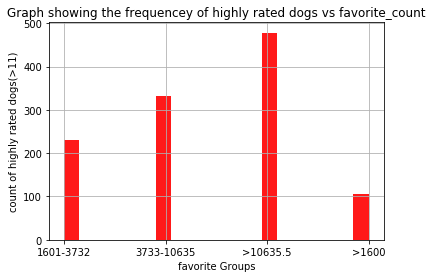

In [370]:
twitter_archive_clean.favorites_groups[highly_rated].hist(alpha=0.9, color='red', bins=20,label='high')
plt.xlabel('favorite Groups')
plt.ylabel('count of highly rated dogs(>11)')
plt.title('Graph showing the frequency of highly rated dogs vs favorite_count')
;

**Question 2**

**Is there a correlation between favorites and retweet counts?**

''

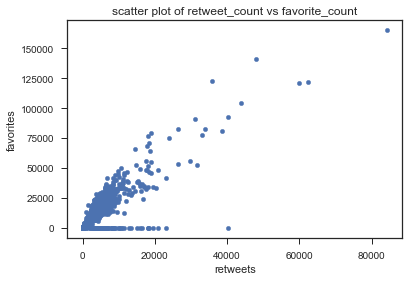

In [378]:
twitter_archive_clean.plot(x="retweets", y="favorites", kind ="scatter")
plt.xlabel('retweets')
plt.ylabel('favorites')
plt.title('scatter plot of retweet_count vs favorite_count')
;

In [377]:
# correlation coeffient
twitter_archive_clean.corr().loc['retweets','favorites']

0.8551130242393045

**Question 3**

**Which dog had the lowest and highest retweets?**

In [339]:
# querying for the dog with the least retweets
twitter_archive_clean.loc[twitter_archive_clean['retweets'] == 12]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites_groups,highly_rated,low_rated
2033,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None,2015-11-16 00:00:00,03:55:04,80,12,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,english_setter,0.298617,True,newfoundland,0.149842,True,borzoi,0.133649,True,>1600,False,False


In [340]:
# to get the dog information for index 2033
print(twitter_archive_clean.loc[[2033]], pd.set_option('display.max_columns', 29))

                tweet_id            timestamp  \
2033  666102155909144576  2015-11-16 03:55:04   

                                                 source  \
2033  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
2033  Oh my. Here you are seeing an Adobe Setter giv...   

                                          expanded_urls  rating_numerator  \
2033  https://twitter.com/dog_rates/status/666102155...                11   

      rating_denominator  name doggo floofer pupper puppo  \
2033                  10  None  None    None   None  None   

                     date      time  favorites  retweets  \
2033  2015-11-16 00:00:00  03:55:04         80        12   

                                              jpg_url              p1  \
2033  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg  english_setter   

       p1_conf  p1_dog            p2   p2_conf  p2_dog      p3   p3_conf  \
2033  0.298617    True  newfoundland  0.1

In [337]:
# querying for the dog with the most retweets
twitter_archive_clean.loc[twitter_archive_clean['retweets'] == 84243]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites_groups,highly_rated,low_rated
843,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None,2016-06-18 00:00:00,18:26:18,165045,84243,https://pbs.twimg.com/ext_tw_video_thumb/74423...,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,>10635.5,True,True


In [338]:
# to get the dog information for index 2
print(twitter_archive_clean.loc[[843]], pd.set_option('display.max_columns', 29))

               tweet_id            timestamp  \
843  744234799360020481  2016-06-18 18:26:18   

                                                source  \
843  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
843  Here's a doggo realizing you can stand in a po...   

                                         expanded_urls  rating_numerator  \
843  https://twitter.com/dog_rates/status/744234799...                13   

     rating_denominator  name  doggo floofer pupper puppo  \
843                  10  None  doggo    None   None  None   

                    date      time  favorites  retweets  \
843  2016-06-18 00:00:00  18:26:18     165045     84243   

                                               jpg_url                  p1  \
843  https://pbs.twimg.com/ext_tw_video_thumb/74423...  labrador_retriever   

      p1_conf  p1_dog        p2   p2_conf  p2_dog       p3   p3_conf  p3_dog  \
843  0.825333    True  ice_bear  0.04

**Question 4**

**Is the dog with the 1776 rating numerator just a typo or an outlier?**

In [341]:
# querying for the dog with the highest rating
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites_groups,highly_rated,low_rated
794,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None,2016-07-04 00:00:00,15:00:45,5428,2654,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,3733-10635,True,True


In [342]:
print(twitter_archive_clean.loc[[794]], pd.set_option('display.max_columns', 29))

               tweet_id            timestamp  \
794  749981277374128128  2016-07-04 15:00:45   

                                                source  \
794  <a href="https://about.twitter.com/products/tw...   

                                                  text  \
794  This is Atticus. He's quite simply America af....   

                                         expanded_urls  rating_numerator  \
794  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name doggo floofer pupper puppo  \
794                  10  Atticus  None    None   None  None   

                    date      time  favorites  retweets  \
794  2016-07-04 00:00:00  15:00:45       5428      2654   

                                             jpg_url       p1   p1_conf  \
794  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg  bow_tie  0.533941   

     p1_dog          p2   p2_conf  p2_dog        p3   p3_conf  p3_dog  \
794   False  sunglasses  0.080822   False  sun

In [311]:
# store data to a csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [313]:
# read the csv file and get column summary
twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 29 columns):
tweet_id              2050 non-null int64
timestamp             2050 non-null object
source                2050 non-null object
text                  2050 non-null object
expanded_urls         2050 non-null object
rating_numerator      2050 non-null int64
rating_denominator    2050 non-null int64
name                  2050 non-null object
doggo                 2050 non-null object
floofer               2050 non-null object
pupper                2050 non-null object
puppo                 2050 non-null object
date                  2050 non-null object
time                  2050 non-null object
favorites             2050 non-null int64
retweets              2050 non-null int64
jpg_url               2050 non-null object
p1                    2050 non-null object
p1_conf               2050 non-null float64
p1_dog                2050 non-null bool
p2                    2050 non-null obj

#### References

1. Deleting DataFrame row in Pandas based on column value. Retrived from https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value on 11/4/2018.

2. Querying Api by Ryan Wingate. Retrieved on 11/4/2018 from https://ryanwingate.com/assets/3/wrangle_act.html